In [91]:
from __future__ import division, print_function
from __future__ import unicode_literals
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [92]:
def barplot_medians(cell_types, human_method_names, method_names, imp_scores_fh):
    #print(method_names)
    #print("\n".join([str(round(x,2)) for x in [np.median(method_name_to_vals[method_name]) for method_name in method_names]]))
    #print("\n".join(["\t".join([str(round(x,2)) for x in row])
    #           for row in comparisons]))
    
    plt.figure(figsize=(14,10))
    
    df_delta = []
    df_cell_type = []
    df_method = []
    
    for cell_type in cell_types:
        for method_name,human_method_name in zip(method_names,human_method_names):
            for val in np.array(fh[cell_type][method_name]):
                df_delta.append(val)
                df_cell_type.append(cell_type)
                df_method.append(human_method_name)
    
    df = pd.DataFrame({
        'Δlogit': df_delta,
        'Method': df_method,
        'Cell Type': df_cell_type
    })

    sns.set(style="whitegrid", font_scale=2.7)
    sns.barplot(x="Cell Type", y="Δlogit", hue='Method', data=df)
    plt.title("Δlogit After Perturbing Top 20% of Ranked Positions")
    plt.legend(loc='lower left')
    plt.show()

def make_labeled_heatmap(human_method_names, method_names, method_name_to_vals, comparisons):
    
    fig, ax = plt.subplots(figsize=(2*len(method_names),2*len(method_names)))
    im = ax.imshow(comparisons)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(method_names)))
    ax.set_yticks(np.arange(len(method_names)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(human_method_names)
    ax.set_yticklabels(human_method_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(method_names)):
        for j in range(len(method_names)):
            text = ax.text(j, i, np.round(comparisons[i, j],2),
                           ha="center", va="center", color=('black' if comparisons[i, j] > 0.5
                                                            else 'white'))
    #ax.set_title("Proportion of examples where method in row is better than method in column")
    fig.tight_layout()
    plt.show()

In [93]:
fh = h5py.File("diff_cell_type_model_fidelity_results.h5","r")

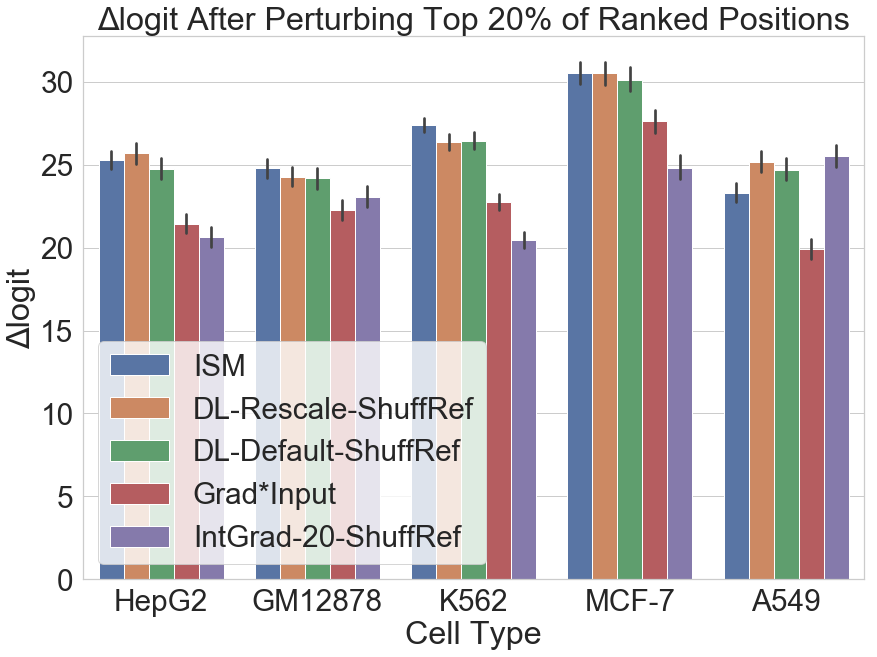

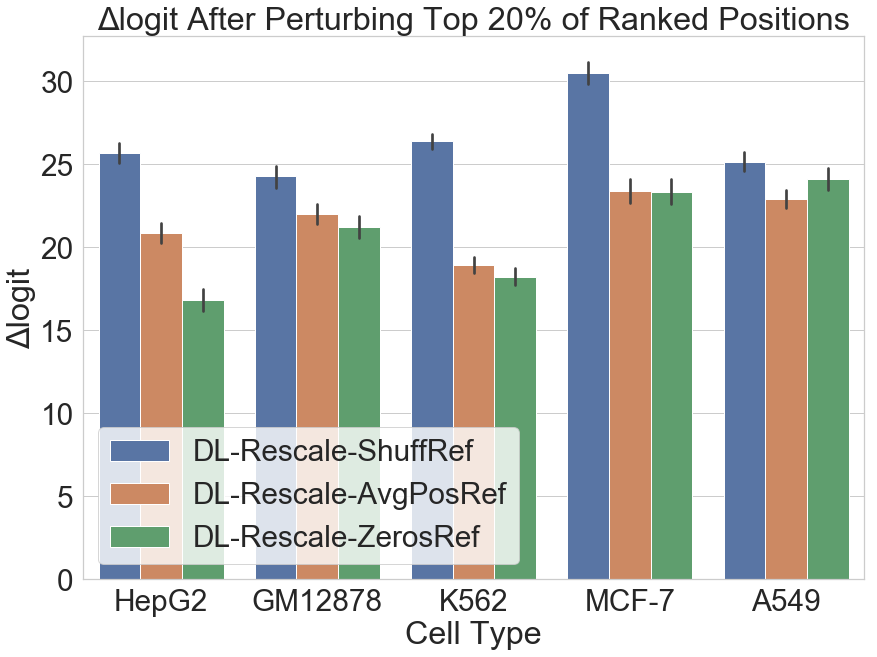

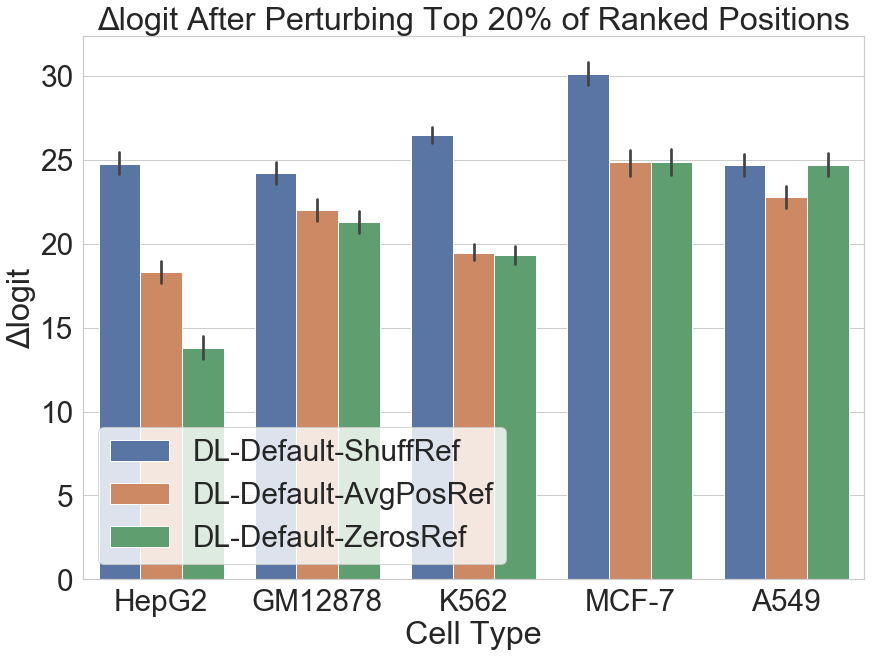

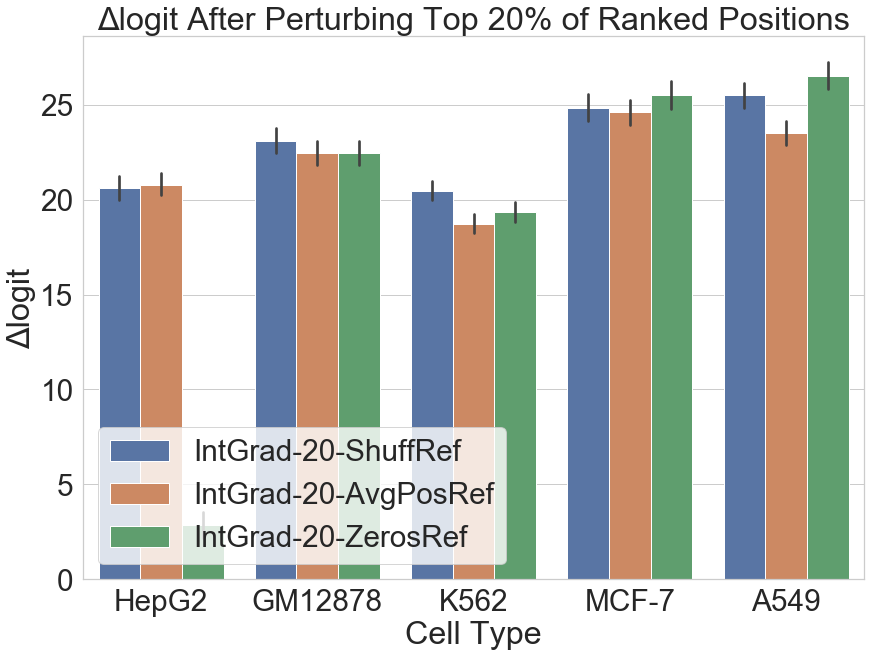

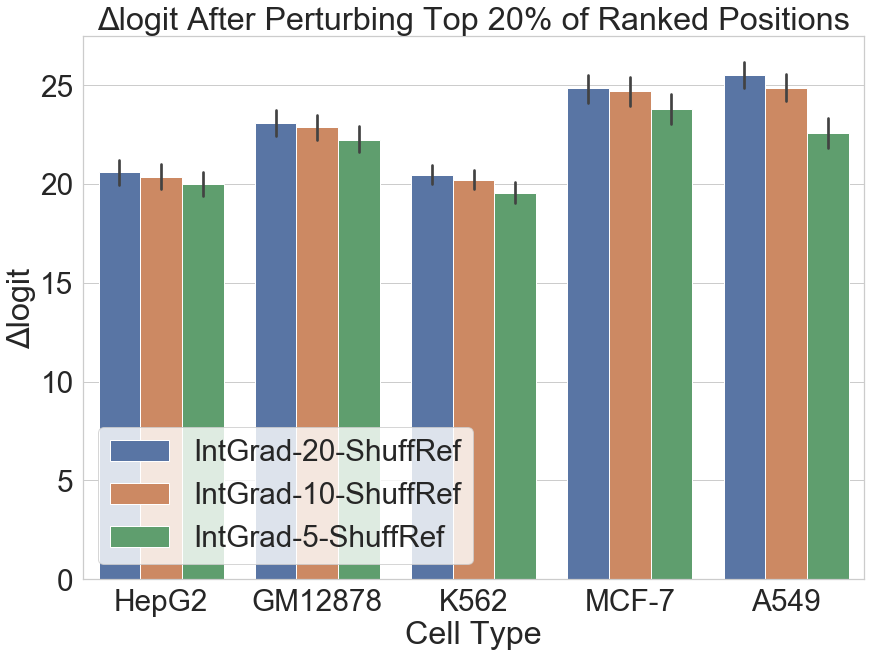

In [94]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 22})

method_groupings = [
   [('scores_ism','ISM'),  
    ('scores_deeplift_rescale_dinucshuff','DL-Rescale-ShuffRef'),
    ('scores_deeplift_genomicsdefault_dinucshuff','DL-Default-ShuffRef'),
    ('scores_grad_times_inp_flatref','Grad*Input'),
    ('scores_integrated_grad20_dinucshuff','IntGrad-20-ShuffRef'),
    #('random','Random')
   ],
    
    [
    ('scores_deeplift_rescale_dinucshuff','DL-Rescale-ShuffRef'),
    ('scores_deeplift_rescale_avgposref','DL-Rescale-AvgPosRef'),    
    ('scores_deeplift_rescale_flatref','DL-Rescale-ZerosRef'),

    #('random','Random')
    ],
    
    [
    ('scores_deeplift_genomicsdefault_dinucshuff','DL-Default-ShuffRef'),
    ('scores_deeplift_genomicsdefault_avgposref','DL-Default-AvgPosRef'),
    ('scores_deeplift_genomicsdefault_flatref','DL-Default-ZerosRef'),

    #('random','Random')
    ],
    
    [
    ('scores_integrated_grad20_dinucshuff','IntGrad-20-ShuffRef'),
    ('scores_integrated_grad20_avgposref','IntGrad-20-AvgPosRef'),
    ('scores_integrated_grad20_flatref','IntGrad-20-ZerosRef'),
    #('random','Random')
    ],
    
    [
    ('scores_integrated_grad20_dinucshuff','IntGrad-20-ShuffRef'),
    ('scores_integrated_grad10_dinucshuff','IntGrad-10-ShuffRef'),
    ('scores_integrated_grad5_dinucshuff','IntGrad-5-ShuffRef'),
    #('scores_integrated_grad2_dinucshuff','IntGrad-2-ShuffRef'),
    #('random','Random')
    ],
]

cell_types = ['HepG2', 'GM12878', 'K562', 'MCF-7', 'A549']

for method_grouping in method_groupings:
    method_names,human_method_names = zip(*method_grouping)
    
    barplot_medians(cell_types, human_method_names,
                    method_names, imp_scores_fh=fh)
    
    """
    for cell_type in cell_types:
         
        
        print("Cell type",cell_type)
        method_name_to_vals = dict([
            (method_name, np.array([x for x in np.array(fh[cell_type][method_name])]))
            for method_name in method_names
        ])  
        comparisons = np.zeros((len(method_names), len(method_names)))
        for idx1,method1_name in enumerate(method_names):
            for idx2,method2_name in enumerate(method_names):
                proportion_method1_greater =\
                    ((np.sum(method_name_to_vals[method1_name] > method_name_to_vals[method2_name])
                     + 0.5*np.sum(method_name_to_vals[method1_name] == method_name_to_vals[method2_name]))/
                     len(method_name_to_vals[method1_name]))
                comparisons[idx1, idx2] = proportion_method1_greater
        make_labeled_heatmap(human_method_names,method_names, method_name_to_vals, comparisons)
    """